### Import of custom libraries and classes

In [1]:
import sys

# This code can be ran locally or from Google Colab. Uncomment the following lines for data to be accessible from google drive/colab.
#from google.colab import drive 
#drive.mount('/content/drive', force_remount=True)
#sys.path.append('/content/drive/My Drive/Colab Notebooks/Projecte 1/classes')

sys.path.append('./classes') # If running locally

import pandas as pd

import persona as p
import recommendation as r

import filemanager
import makegraphs

from filmstats import filmmeans, mostseen, notseen, soulmates

### Data acquisition


Data is stored in a plan text `csv` format file, located at `./input/import.csv`. The first row contains the headers, and the first column the username. Each row will consist of the username and their rating for each film.

Reading the data is carried out by the `filemanager` module, using the `read_input_file()` function (that relies on the `pd.read_csv()` method in Pandas).

Example of the data stored in the csv file:


```
Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994)
MintbuzzMedius,4,2,4,3,5,0
Ineuntrain_99,3,2,5,5,1,5
```

In [2]:
df = filemanager.read_input_file()
#show on screen what has been done
df.head()

,Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
0,MintbuzzMedius,5,5,5,5,5,5,4,0,1,5,5,2,2,5,5,1
1,Frances_Gazebo,3,3,3,0,1,2,3,0,1,3,0,1,2,1,1,1
2,Realmdog16,4,2,4,5,1,2,0,3,2,4,5,1,2,0,5,5
3,Spoolmhorn,4,2,4,0,1,2,0,0,4,4,0,1,2,0,1,5
4,Ineuntrain_99,2,1,0,0,5,5,0,0,3,0,0,5,5,3,2,5


In [3]:
df.describe()

,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.617647,2.382353,1.882353,2.941176,3.205882,2.911765,2.588235,2.470588,2.911765,2.764706,2.735294,1.529412,2.470588,2.911765,2.117647,2.235294
std,1.775502,1.633266,1.532767,1.873923,2.085729,1.712125,1.559286,2.338548,1.896850,2.147004,1.911826,1.637354,2.018630,2.094258,2.026562,1.939366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.250000,0.000000,1.250000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.250000
50%,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,3.000000,4.000000,1.000000,2.000000
75%,4.000000,3.750000,3.000000,4.000000,5.000000,4.000000,3.750000,4.000000,4.000000,5.000000,5.000000,2.000000,4.000000,5.000000,4.750000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Data preparation


#### Creating data structures



##### `films` tuple
First of all, from the data obtained when importing the csv file, the list of films is stored in the `films` tuple:

In [4]:
#create tuple containing all films 
films = []
for col in df.columns: 
    films.append(col)
films = tuple(films [1:])
#show on screen what has been done 
print(films)

('The Godfather (1972)', 'Jurassic Park (1993)', 'Back to the Future (1985)', 'Indiana Jones and the Temple of Doom (1984)', 'E.T. the Extra-Terrestrial (1982)', 'Pulp Fiction (1994)', 'Jaws (1975)', 'Rocky (1976)', 'The Shawshank Redemption (1994)', 'Platoon (1986)', 'Braveheart (1995)', 'Forrest Gump (1994)', 'The Terminator (1984)', 'Taxi Driver (1976)', 'Scarface (1983)', 'Goodfellas (1990)')


##### `ratings` tuple
Next, a second tuple is created, `ratings`, containing the list of ratings for each film, preceded by the username:

In [5]:
#create tuple containing ratings for each person 
ratings = tuple(df.values.tolist())

#show on screen what has been done 
ratings_headers = list(films)
ratings_headers.insert(0,"Username")
pd.DataFrame(ratings, columns=ratings_headers).head(10)

,Username,The Godfather (1972),Jurassic Park (1993),Back to the Future (1985),Indiana Jones and the Temple of Doom (1984),E.T. the Extra-Terrestrial (1982),Pulp Fiction (1994),Jaws (1975),Rocky (1976),The Shawshank Redemption (1994),Platoon (1986),Braveheart (1995),Forrest Gump (1994),The Terminator (1984),Taxi Driver (1976),Scarface (1983),Goodfellas (1990)
0,MintbuzzMedius,5,5,5,5,5,5,4,0,1,5,5,2,2,5,5,1
1,Frances_Gazebo,3,3,3,0,1,2,3,0,1,3,0,1,2,1,1,1
2,Realmdog16,4,2,4,5,1,2,0,3,2,4,5,1,2,0,5,5
3,Spoolmhorn,4,2,4,0,1,2,0,0,4,4,0,1,2,0,1,5
4,Ineuntrain_99,2,1,0,0,5,5,0,0,3,0,0,5,5,3,2,5
5,Clathrose,3,2,0,1,5,2,3,0,1,0,1,5,3,0,4,5
6,DarkwrathDingy,1,2,3,5,0,1,2,3,0,3,5,0,3,0,3,0
7,Razzmatazz,4,2,0,4,0,2,1,4,5,0,4,5,5,1,5,0
8,Aquiform,3,4,1,1,5,1,2,3,4,0,2,1,5,5,1,5
9,ChevetYawp,4,0,3,2,5,4,3,4,0,4,3,0,1,1,1,1


##### `Persona` object list
At this point, a list to store the objects of the class `Persona` is created, containing the username, followed by the film ratings in diccionary form (with the film title as the key).

e.g. object `Persona` for user `Isonymmc814`, stored at `people[2]`:

```
    Isonymmc814: {'The Godfather (1972)': 0, 'Jurassic Park (1993)': 2, 'Back to the Future (1985)': 1, 'Indiana Jones and the Temple of Doom (1984)': 4, 'E.T. the Extra-Terrestrial (1982)': 5, ... }
```

In [6]:
# Create an object for each person, containing their name and a dictionary with the films and their ratings, and store in a list
people = []
for j in range(0,len(ratings)):
    a = p.Persona(ratings[j],films)
    people.append(a)

    # Show on screen what has been done 
    print(people[j])

MintbuzzMedius: {'The Godfather (1972)': 5, 'Jurassic Park (1993)': 5, 'Back to the Future (1985)': 5, 'Indiana Jones and the Temple of Doom (1984)': 5, 'E.T. the Extra-Terrestrial (1982)': 5, 'Pulp Fiction (1994)': 5, 'Jaws (1975)': 4, 'Rocky (1976)': 0, 'The Shawshank Redemption (1994)': 1, 'Platoon (1986)': 5, 'Braveheart (1995)': 5, 'Forrest Gump (1994)': 2, 'The Terminator (1984)': 2, 'Taxi Driver (1976)': 5, 'Scarface (1983)': 5, 'Goodfellas (1990)': 1}
Frances_Gazebo: {'The Godfather (1972)': 3, 'Jurassic Park (1993)': 3, 'Back to the Future (1985)': 3, 'Indiana Jones and the Temple of Doom (1984)': 0, 'E.T. the Extra-Terrestrial (1982)': 1, 'Pulp Fiction (1994)': 2, 'Jaws (1975)': 3, 'Rocky (1976)': 0, 'The Shawshank Redemption (1994)': 1, 'Platoon (1986)': 3, 'Braveheart (1995)': 0, 'Forrest Gump (1994)': 1, 'The Terminator (1984)': 2, 'Taxi Driver (1976)': 1, 'Scarface (1983)': 1, 'Goodfellas (1990)': 1}
Realmdog16: {'The Godfather (1972)': 4, 'Jurassic Park (1993)': 2, 'Back

#### Entering the target user and algorithm

At point, we will be asked to enter the username to which we want to obtain the recommendations. Once the username is entered, its `Persona` instance is searched within the `people[]` list.

Right after that, we will have the option to continue using Euclidian distance or Pearson correlation, two algorithms that can be used to calculate affinity between users.

In [7]:
target = input("Who do you want to get movie recommendations for?? (e.g. Udalna95\n")
#look up in existing Persona objects, if not present return error message and exit
###perhaps it would be better to prompt user for another entry###
found = False
for pers in range(0,len(people)):
  if target == people[pers].get_name():
    found = True
    break
if not found:
    print("Username not found.")
    sys.exit()

distancealgorithm = input("What comparison algorithm should be used? (Euclidean / Pearson)\n").lower() # Must be either "euclidean" or "pearson"
while distancealgorithm not in ["pearson", "euclidean"]:
  distancealgorithm = input("Non-valid algorithm. \'Euclidean\' o \'Pearson?\' ").lower()

print("Alright, let's search recommendations for", target, "with the",  distancealgorithm, "algorithm.")

Alright, let's search recommendations for Meirin with the pearson algorithm.


### Calculating the distance between users

To obtain the distance between two users, the class `Distancia` (distancia.py) is used. This class is defined as abstract (derives from the ABC metaclass), and therefore objects cannot be created from it. Moreover, it includes the abstract method `.Dist()` which is implemented in the subclasses `DistanciaEuclidiana` and `DistanciaPearson`, which inherit from it.

This abstract method `.Dist()` receives the two usernames to compare as two instances of the `Persona` object, and the distance algorithm we want to use (`euclidean` or `pearson`).

The method uses internally the already existing `ratings` tuple, (and later assigned to the `Persona` object, accessible through the `.get_ratings()` method), to compare the series of ratings between two users.

e.g. comparing the users `Ineutrain_99` and `Peripatetic`.
```
[3, 2, 5, 3, 3, 5]
[4, 2, 4, 3, 5, 0]
```
A `0` value in a rating indicate that a movie has not been yet rated by that user. Therefore, that rating pair will be ignored when the comparisons are performed.

The distance can be calculated using the Pearson correlation or the Euclidean distance:

#### Pearson correlation
The result will be a value between -1 and 1. A higher value indicates a higher affinity between users. The calculation is done through the `np.corrcoef()` from the *NumPy* library. 

*(Note: due to limitations in the algorithm, the distance cannot be computed if there are less than 4 rating pairs, or if all the ratings for a user are the same one (e.g. `[4, 4, 4, 4, 4, 4]`).* 

#### Euclidean distance
The result will be a value between 0 and 4 (the difference in the rating range, where people can vote from 1 to 5). Broadly speaking, since it is a unidimensional variable, the distance for each rating pair is calculated with the `np.sqrt(np.sum((p[i]-q[i])**2))` formula and these values are then averaged (with the help of `np.nanmean(distance)`.



In [8]:
### The code containing the distance calculation is executed when the
### classification table is created

### Classification table

The attribute `classification_table` from the object `Persona` (here instantiated as an element of the `people[k]` list) is a list of dictionaries. It's a table where the rest of the users ("critics") appear, each one with the distance, their rating for each film, and the corrected rating for each film (inicated wi the `_corrected` suffix). This table will be unique for each user, since the corrected ratings are personalized.

To obtain the corrected rating, we multiply the user's rating with the affinity degree.

For example:


> The user `Hippedrikp` rated `Taxi Driver (1976)` with a `5` out of 5, and the affinity (distance) with the selected username is `0.64`, therefore, the corrected rating will be `3.18`).

The table would look like this:

```
Critic          Distance               Taxi Driver (1976)         Taxi Driver (1976)_corrected
Hippedrikp      0.64                   5                          3.18
Ketperhd        0.80                   1                          0.80
Placidre1022    0.67                   5                          3.33
.
.
.
```

We can display the table by using the method `.get_classificationtable(title)`, where the `title` argument will only show the scores for a specific film. Instead, `all` can be used to show the whole table (as a pandas table) or `raw` to list it directly through python. *(uncomment el `input()` line to make it interactive)*.

**Note: Furthermore, there's a second correction, by popularity, that is is applied only when the recommendations are generated (explained in its own section).*

In [9]:
# Search for the specified person ('target')
for k in range(0,len(people)):
  if people[k].get_name() == target:
    # We generate the classification table for that user.
    people[k].classification_table = r.Recommendation.classificationtable(people[k], people, films, distancealgorithm)
    break

# Display the classification table, complete or just for one specific film
#title = input("Show classification table for film (<title> [e.g. \"Jaws (1975)\"] / all / raw): ")
title = "Jaws (1975)"
people[k].get_classificationtable(title)



Generating the classification table for Meirin ...
...done.

Classification table of Jaws (1975) for Meirin


,Critic,Affinity,Jaws (1975),Jaws (1975)_corrected
32,Wonx,0.94,3,2.82
21,Ollamhnfish,0.86,3,2.58
4,Ineuntrain_99,0.78,0,0.00
5,Clathrose,0.74,3,2.21
8,Aquiform,0.73,2,1.46
19,Udalna95,0.70,0,0.00
9,ChevetYawp,0.68,3,2.03
22,Sutorts02,0.65,2,1.29
0,MintbuzzMedius,0.62,4,2.48
13,Moduloman0710,0.61,2,1.21


#### Affinity with the rest of the users


Affinity table for Meirin


,Critic,Affinity
32,Wonx,0.94
21,Ollamhnfish,0.86
4,Ineuntrain_99,0.78
5,Clathrose,0.74
8,Aquiform,0.73
19,Udalna95,0.70
9,ChevetYawp,0.68
22,Sutorts02,0.65
0,MintbuzzMedius,0.62
13,Moduloman0710,0.61


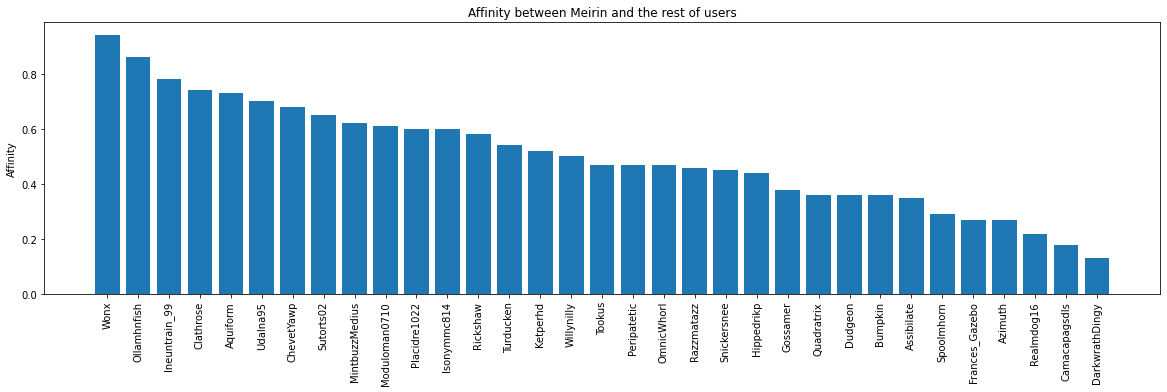

In [10]:
# The method .get_affinity() shows only the distance (affinity) of the selected user with the rest.
people[k].get_affinity()

# Generates a graph bar with the affinities with the other users
makegraphs.intermediate_graphs(target, people[k].classification_table)

### Film statistics


The module `filmstats.py` allows us to visualize some film statistics, although these functions are used internally in other functions and methods.

For instance, there is the function `mostseen()` that shows a list of the movies with most views.

In [11]:
print("Most popular films:")
mesvistos = mostseen(people, films)
films_mostpopular = []
films_mostpopular_headers = ["Title", "seen by", "% of users"]
for film in sorted(mesvistos.items(), key=lambda x:x[1], reverse=True):
  films_mostpopular.append([film[0], str(film[1])+"/"+str(len(people)), str(round(film[1]/len(people)*100,2))])

display(pd.DataFrame(films_mostpopular, columns=films_mostpopular_headers))

Most popular films:


,Title,seen by,% of users
0,Pulp Fiction (1994),31/34,91.18
1,The Godfather (1972),29/34,85.29
2,Jaws (1975),29/34,85.29
3,Jurassic Park (1993),28/34,82.35
4,E.T. the Extra-Terrestrial (1982),28/34,82.35
5,The Shawshank Redemption (1994),28/34,82.35
6,Braveheart (1995),28/34,82.35
7,Indiana Jones and the Temple of Doom (1984),27/34,79.41
8,Taxi Driver (1976),27/34,79.41
9,Goodfellas (1990),25/34,73.53


### Generation of recommendations
Next, we use the class `Recommendation` within the module `recommendation`.

This class, to which we pass the referenced username, the list of `people` objects, and the minimum rating threshold for a recommendation, will create an object (stored in `c`) containing the recommendations. These recommendations are accessed through the `.get_recommendation()` method, which will return a dictionary with the movie title as the key, and its corrected rating for the username as the value.

Internally, it checks which films have not been watched by the user (`notseen()` function), and using the mean of the corrected ratings for each user (`filmmeans()` function) for these films, a correction for popularity is applied (multiplying the viewing ration for each film (`mostseen()`) and checks if a particular film is over the rating threshold that we specified.

For instance:

> We use a `0.65` threshold (over a theoretical maximum value of 5). `notseen()` tells us that `Wonx` has not watched `Indiana Jones and the Temple of Doom (1984)`, `Rocky (1976)` or `Forest Gump (1994)`, among others. `Indiana Jones and the Temple of Doom (1984)` has a corrected rating of `1.35` (we can check that in its `classification_table`), and, since it's a movie seen by `79.41%` of the users, the popularity corrected rating will be `1.07`. Since it's over the `0.65` threshold, it will be recommended. However, `Forest Gump (1994)` has a popularity corrected rating of `0.49`, therefore it won't recommended to the user.

In [12]:
# Create object recommendation and make recommendations based on distance. 
# The fouth parameter is the minimum popularity-corrected rating for our recommendations. Higher number will yield fewer results
c = r.Recommendation(people[k],people,films,0.65)

#print("\n\nRecommendation:", c.get_recommendation()) # non-sorted dict with title as key and corrected rating as value
print("\n\nRecommendations for", people[k].get_name(),":")
index = 0
film_recommendations = []
film_recommendations_headers = ["Rank", "Title", "Rating (popularity-corrected)"] 
for film in sorted(c.get_recommendation().items(), key=lambda x:x[1], reverse=True):
  index += 1
  #print(str(index)+". "+film[0]+": \t"+str(film[1]))
  film_recommendations.append([str(index), film[0], str(film[1])])
display(pd.DataFrame(film_recommendations, columns=film_recommendations_headers))


Recommendation module:
  Meirin has not seen ['Rocky (1976)', 'Platoon (1986)', 'Braveheart (1995)', 'Forrest Gump (1994)', 'The Terminator (1984)', 'Scarface (1983)', 'Goodfellas (1990)']
  Rocky (1976) Popularity:  58.8 %
  Rocky (1976) Corrected: 1.16 ; Corrected by popularity: 0.68
  Platoon (1986) Popularity:  70.6 %
  Platoon (1986) Corrected: 1.24 ; Corrected by popularity: 0.88
  Braveheart (1995) Popularity:  82.4 %
  Braveheart (1995) Corrected: 1.32 ; Corrected by popularity: 1.09
  Forrest Gump (1994) Popularity:  64.7 %
  Forrest Gump (1994) Corrected: 0.83 ; Corrected by popularity: 0.54
  The Terminator (1984) Popularity:  67.6 %
  The Terminator (1984) Corrected: 1.22 ; Corrected by popularity: 0.83
  Scarface (1983) Popularity:  70.6 %
  Scarface (1983) Corrected: 1.05 ; Corrected by popularity: 0.74
  Goodfellas (1990) Popularity:  73.5 %
  Goodfellas (1990) Corrected: 1.18 ; Corrected by popularity: 0.87


Recommendations for Meirin :


,Rank,Title,Rating (popularity-corrected)
0,1,Braveheart (1995),1.09
1,2,Platoon (1986),0.88
2,3,Goodfellas (1990),0.87
3,4,The Terminator (1984),0.83
4,5,Scarface (1983),0.74
5,6,Rocky (1976),0.68


### Storing the recommendations

In order to store the recommendations, a file named `recommendations.txt` in the `output/` folder is generated, process carried out by the `filemanager.py` class. The script will add a line with the username to which a film is recommended and the title of said film, every time the script is executed.

Additionally, a `csv` file with the name of the user to which a film has been recommended and the suffix `_recommendations` is created in the `output/detailed recommendations` folder, containing all the films that the user has not seen and their relative scores.

In [13]:
#store recommended film
if bool(c.get_recommendation()):
  filemanager.store_recommended_film(target, c.get_recommendation())
  filemanager.store_personalized_films(target, c.get_recommendation())
else:
  print("Couldn't recommend any films to this user.")
  print("Either they have seen all of them, or the system does not believe they would enjoy any of the non-watched ones.")

File ./output/recommendations.txt updated with recommendations for Meirin
./output/detailed recommendations/Meirin_recommendations.csv file created


### Other graphs
Using `Matplotlib`, a series of complementary graphs are generated. For instance, showing the corrected scores for non-watched movies, the affinity with other users, rating histograms for recommended films, mean rating per film and the score distribution per user and film.

#### Non-watched film recommendations
(bar graph with the non-watched films and their corrected scores)

                          0
Rocky (1976)           0.68
Scarface (1983)        0.74
The Terminator (1984)  0.83
Goodfellas (1990)      0.87
Platoon (1986)         0.88
Braveheart (1995)      1.09


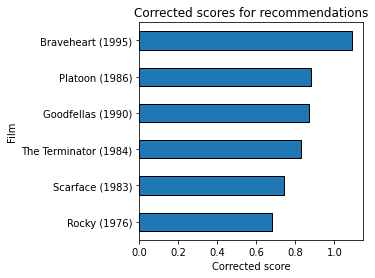

In [14]:
if bool(c.get_recommendation()):
  makegraphs.recommendations_graph(c.get_recommendation())

#### Voting histogram for recommended films

{'Rocky (1976)': 0.68, 'Platoon (1986)': 0.88, 'Braveheart (1995)': 1.09, 'The Terminator (1984)': 0.83, 'Scarface (1983)': 0.74, 'Goodfellas (1990)': 0.87}
Rocky (1976)
1    0
2    0
3    0
4    0
5    5
9    1
dtype: int64


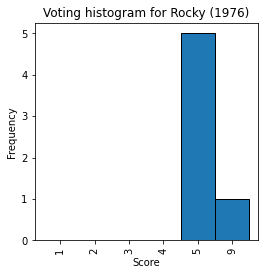

Platoon (1986)
1     3
2     1
3     2
4     7
5    11
dtype: int64


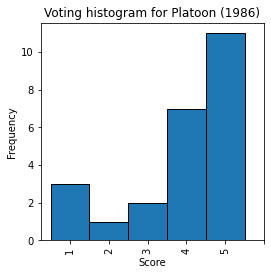

Braveheart (1995)
1     4
2     8
3     1
4     5
5    10
dtype: int64


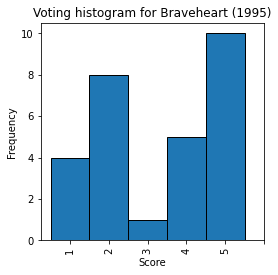

The Terminator (1984)
1    1
2    4
3    5
4    5
5    8
dtype: int64


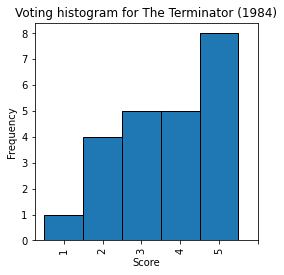

Scarface (1983)
1    8
2    3
3    3
4    1
5    9
dtype: int64


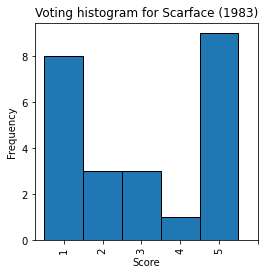

Goodfellas (1990)
1    6
2    6
3    1
4    5
5    7
dtype: int64


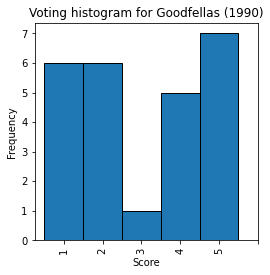

In [15]:
if bool(c.get_recommendation()):
  makegraphs.rating_histogram(c.get_recommendation(), people[k].classification_table)

#### User affinity heatmap


Generating the classification table for MintbuzzMedius ...
...done.
            Critic
0   Frances_Gazebo
1       Realmdog16
2       Spoolmhorn
3    Ineuntrain_99
4        Clathrose
5   DarkwrathDingy
6       Razzmatazz
7         Aquiform
8       ChevetYawp
9     Placidre1022
10        Ketperhd
11        Gossamer
12   Moduloman0710
13       Turducken
14      OmnicWhorl
15      Quadratrix
16     Isonymmc814
17   Camacapagsdls
18        Udalna95
19     Peripatetic
20     Ollamhnfish
21       Sutorts02
22         Bumpkin
23         Azimuth
24      Hippedrikp
25        Rickshaw
26      Willynilly
27      Assibilate
28          Tookus
29         Dudgeon
30     Snickersnee
31          Meirin
32            Wonx

Generating the classification table for MintbuzzMedius ...
...done.

Generating the classification table for Frances_Gazebo ...
...done.

Generating the classification table for Realmdog16 ...
...done.

Generating the classification table for Spoolmhorn ...
...done.

Generating the c

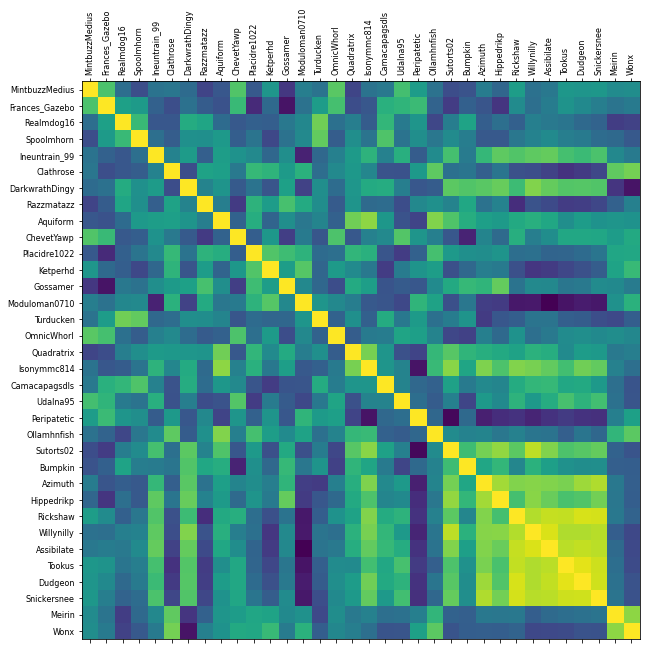

In [16]:
# User affinity heatmap
makegraphs.affinity_heatmap(people, films, distancealgorithm)

#### Rating distribution for the most recommended film

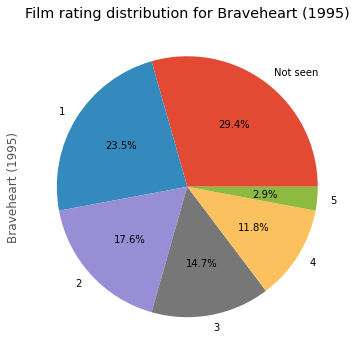

In [19]:
# Pie chart for rating distribution for the highest recommended film
if bool(c.get_recommendation()):
  makegraphs.output_graphs(df,max(c.get_recommendation(), key=c.get_recommendation().get))

#### Other graphs

/home/marc/Nextcloud/PersonalMarc/git repository/film-recommender-system/./classes/makegraphs.py:56: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().sort_values(ascending=False).plot(kind='bar')


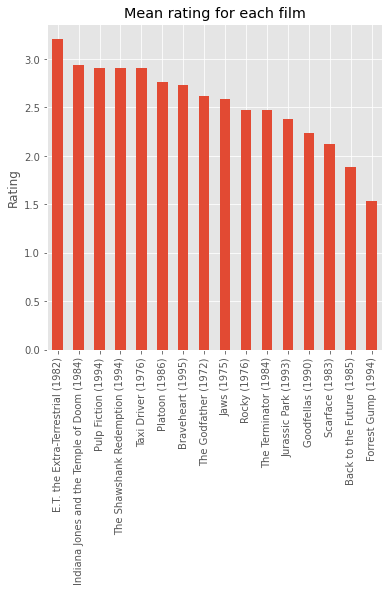

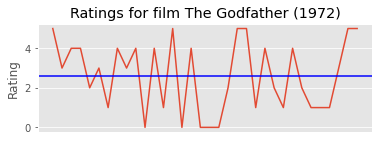

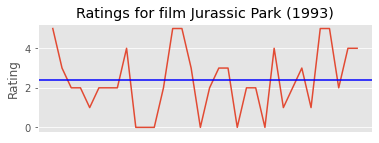

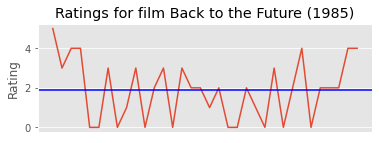

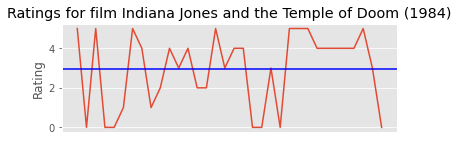

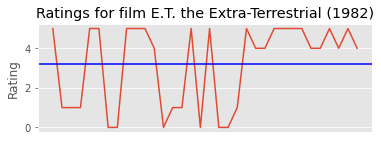

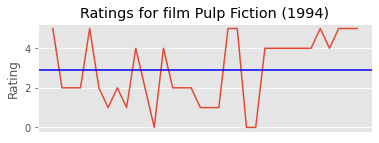

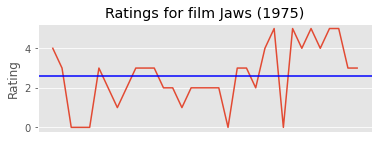

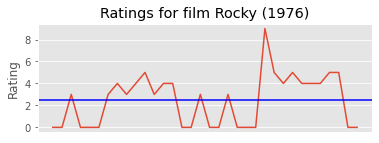

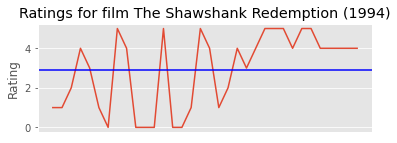

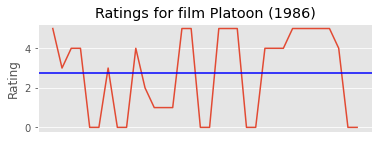

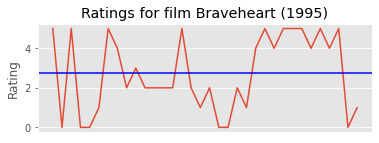

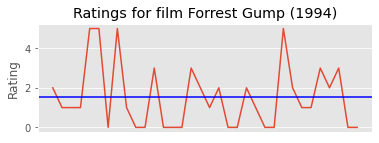

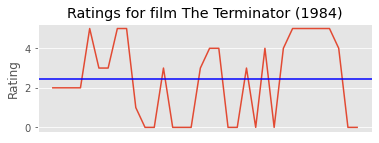

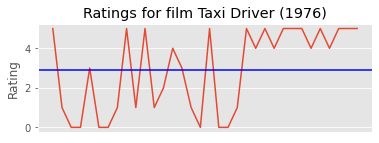

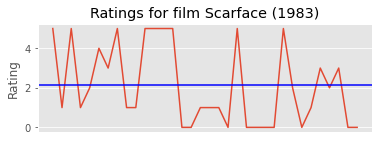

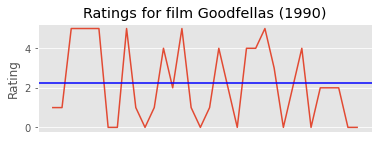

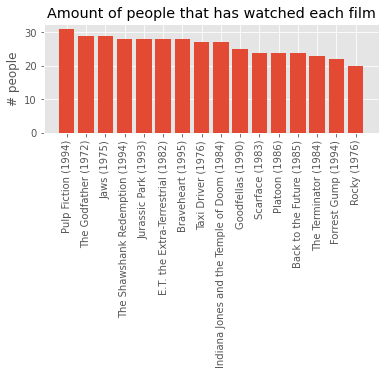

In [20]:
# Plots for mean score for each film, score distributions among users, and most popular films
makegraphs.input_graphs(df)

### Modules, classes and methods used in this script

#### `recommendation.py`
Includes the class `Recommendation`, and inside, the method `classificationtable()`, which generates the classification table for the `Person` objects, by invoking the distance calculation methods in the `distancia.py` module.

In this class constructor, the recommendations for non-watched films are calculated for the specified user.

#### `distancia.py`

Composed by the abstract class `Distancia(ABC):`, with the subclasses `DistanciaEuclidiana(Distancia)` and `DistanciaPearson(Distancia)`, which are in charge of calculating the distance between users with the two respective algorithms. Moreover, it contains the `newrange()` methods to addapt the score ranges.

#### `persona.py`
This module contains the `Persona` class, responsible for the creation of the `persona` objects that store all the user data, like the username, ratings, and the classification table.



It also includes methods that return this information in an orderly manner.

#### `filemanager.py`
This is a module that includes the `read_input_file()`,  `store_recommended_film()`, `store_personalized_films()` functions, to read the data source, save the recommendations in a general file, or for a user in particular (in `csv` format), respectively.

#### `filmstats.py`
Module that contains a set of functions to extract statistical data related to the movies. For instance, `filmmeans(person)` provides the mean ratings for each film; `mostseen()` shows the most popular movies; `notseen(person)` display those moves that have not been watched by a specific user; and `soulmates(persona)` returns those users with whom the reference user shows closer tastes.

#### `makegraphs.py`
This module includes the `input_graphs()`, `intermediate_graphs() `, `output_graphs()`, `recommendations_graph()` and `rating_histogram()` functions aimed to generate a set of plots for the processed data